In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [57]:
#importing data sets
customer=pd.read_csv('Customer Acqusition.csv')
spend=pd.read_csv('spend.csv')
repay=pd.read_csv('Repayment (2).csv')

In [6]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [7]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [58]:
repay.head()

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88


In [10]:
customer.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [11]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [60]:
repay.isnull().sum()

SL No:      1
Customer    0
Month       0
Amount      0
dtype: int64

In [61]:
repay.dropna(inplace=True)

In [62]:
repay.isnull().sum()

SL No:      0
Customer    0
Month       0
Amount      0
dtype: int64

##### 1. In the above dataset,  a. In case age is less than 18, replace it with mean of age values.

In [35]:
mean_original=customer['Age'].mean()
mean_original=int(mean_original)

In [36]:
customer.loc[customer['Age']<18,'Age']=mean_original

#The .loc accessor is used to locate specific rows and columns in the DataFrame. Here, it selects all rows 
#where the condition customer["Age"] < 18 is True and the specific column "Age".

In [37]:
customer

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


#####  b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [38]:
customer.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [39]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [43]:
#merging customer and spend
customer_spend = pd.merge(left=customer, right=spend, on="Customer", how="inner")
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07


In [44]:
#if spend amount is more than the limit, replace it with 50% of that customer’s limit.

customer_spend.loc[customer_spend['Amount']>customer_spend['Limit'],'Amount']=(50*customer_spend['Limit']).div(100)

#####  c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [63]:
repay.head(2)

,SL No:,Customer,Month,Amount
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06


In [64]:
customer.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [68]:
#merging customer and repay
customer_repay=pd.merge(left=customer,right=repay,on='Customer',how='inner')
customer_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,6.0,23-Feb-05,365366.62


In [73]:
#replacing Repayment amount with limit if repayment amount is more than the limit
customer_repay.loc[customer_repay['Amount']>customer_repay['Limit'],'Amount']=customer_repay['Limit']

##### 2. From the above dataset create the following summaries:
 

##### a. How many distinct customers exist?

In [74]:
distinct_customers = customer['Customer'].nunique()

In [75]:
print("Number of distinct customers are",distinct_customers)

Number of distinct customers are 100


##### b. How many distinct categories exist?

In [76]:
customer['Segment'].value_counts()

Segment
Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: count, dtype: int64

In [77]:
print("The number of distinct categories are", len(customer["Segment"].value_counts()))

The number of distinct categories are 5


#####  c. What is the average monthly spend by customers?

In [86]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [87]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [89]:
spend['Month'] = pd.to_datetime(spend['Month'], format='%y-%m-%d')

In [91]:
spend['Monthly']=spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format='%B'))

In [92]:
spend['Yearly']=spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format='%Y'))

In [93]:
spend.head()

,Sl No:,Customer,Month,Type,Amount,Monthly,Yearly
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004
2,3,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,4,A1,2004-01-25,FOOD,484342.47,January,2004
4,5,A1,2005-01-17,CAMERA,369694.07,January,2005


In [99]:
monthly_spend = spend.groupby('Monthly')['Amount'].mean().reset_index()
monthly_spend

,Monthly,Amount
0,April,236671.847533
1,August,236056.328571
2,December,208987.020357
3,February,233037.216471
4,January,256221.133553
5,July,268042.287143
6,June,241329.181250
7,March,246255.783723
8,May,241277.023476
9,November,249099.824405


#####  d. What is the average monthly repayment by customers?

In [100]:
repay.head()

,SL No:,Customer,Month,Amount
1,2.0,A1,3-Jan-04,245899.02
2,3.0,A1,15-Jan-04,259490.06
3,4.0,A1,25-Jan-04,437555.12
4,5.0,A1,17-Jan-05,165972.88
5,6.0,A1,23-Feb-05,365366.62


In [101]:
repay.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1499 entries, 1 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SL No:    1499 non-null   float64
 1   Customer  1499 non-null   object 
 2   Month     1499 non-null   object 
 3   Amount    1499 non-null   float64
dtypes: float64(2), object(2)
memory usage: 58.6+ KB


In [102]:
repay['Month']=pd.to_datetime(repay['Month'], format='%d-%b-%y')

In [104]:
repay['Monthly']=repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format='%B'))

In [113]:
repay['Yearly']=repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format='%Y'))

In [114]:
repay.head(2)

,SL No:,Customer,Month,Amount,Monthly,Yearly
1,2.0,A1,2004-01-03,245899.02,January,2004
2,3.0,A1,2004-01-15,259490.06,January,2004


In [115]:
avg_monthly_repayment=repay.groupby('Monthly')['Amount'].mean().reset_index()
avg_monthly_repayment

,Monthly,Amount
0,April,259649.413200
1,August,254564.734898
2,December,286557.952500
3,February,248756.162368
4,January,244333.932421
5,July,253512.325102
6,June,220647.477083
7,March,241654.966393
8,May,257669.622782
9,November,229867.344524


##### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [116]:
#merging 3 tables
customer_spend_repay = pd.merge(left=customer_spend, right=repay, on="Customer", how="inner")
customer_spend_repay.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y,Monthly,Yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2.0,2004-01-03,245899.02,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,3.0,2004-01-15,259490.06,January,2004


In [117]:
customer_spend_repay.rename(columns={"Amount_x":"Spent_Amount", "Amount_y":"Repayed_Amount"},inplace=True)

In [118]:
customer_spend_repay.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Spent_Amount,SL No:,Month_y,Repayed_Amount,Monthly,Yearly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,2.0,2004-01-03,245899.02,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.8,3.0,2004-01-15,259490.06,January,2004


In [122]:
# grouping the data based on "Yearly","Monthly" columns to get the 'Spend_Amount'and 'Repay_Amount

interest=customer_spend_repay.groupby(['Monthly','Yearly'])[['Spent_Amount','Repayed_Amount']].sum()
interest

Spent_Amount  Repayed_Amount
Monthly   Yearly                              
April     2004    1.194516e+08    2.285403e+08
          2005    9.366405e+07    1.747894e+08
          2006    3.229722e+08    6.093666e+08
August    2005    1.361400e+08    2.477449e+08
          2006    5.849630e+07    7.167032e+07
December  2005    4.348638e+07    9.944533e+07
          2006    4.585222e+07    7.087702e+07
February  2004    7.613922e+07    1.602419e+08
          2005    5.890557e+08    9.416163e+08
          2006    1.654843e+08    2.903280e+08
January   2004    1.083214e+09    1.690292e+09
          2005    1.324129e+08    1.810333e+08
          2006    5.127574e+07    8.974491e+07
July      2005    3.995653e+07    7.997268e+07
          2006    1.444093e+08    2.245720e+08
June      2005    1.174019e+08    2.213774e+08
          2006    5.302118e+07    6.914431e+07
March     2004    5.594171e+07    8.974470e+07
          2006    7.393854e+08    1.115725e+09
May       2004    8.800456e+07    1.411594e+08
          2005    7.149030e+08    1.099197e+09
          2006    3.297954e+08    5.434823e+08
November  2004    5.504612e+07    7.860290e+07
          2005    1.532278e+08    2.763119e+08
          2006    1.124836e+08    1.355832e+08
October   2005    3.140993e+07    6.027830e+07
          2006    5.285823e+07    7.890924e+07
September 2004    5.144278e+07    8.016122e+07
          2005    3.195551e+07    7.530449e+07
          2006    5.395681e+07    8.083199e+07

In [123]:
interest['Profit_Amount']=interest['Repayed_Amount']-interest['Spent_Amount']

In [124]:
interest.head()

Spent_Amount  Repayed_Amount  Profit_Amount
Monthly Yearly                                             
April   2004    1.194516e+08    2.285403e+08   1.090887e+08
        2005    9.366405e+07    1.747894e+08   8.112539e+07
        2006    3.229722e+08    6.093666e+08   2.863944e+08
August  2005    1.361400e+08    2.477449e+08   1.116049e+08
        2006    5.849630e+07    7.167032e+07   1.317402e+07

In [125]:
interest['Interest Earned'] = (2.9*interest['Profit_Amount'])/100

In [126]:
interest

Spent_Amount  Repayed_Amount  Profit_Amount  Interest Earned
Monthly   Yearly                                                              
April     2004    1.194516e+08    2.285403e+08   1.090887e+08     3.163572e+06
          2005    9.366405e+07    1.747894e+08   8.112539e+07     2.352636e+06
          2006    3.229722e+08    6.093666e+08   2.863944e+08     8.305437e+06
August    2005    1.361400e+08    2.477449e+08   1.116049e+08     3.236542e+06
          2006    5.849630e+07    7.167032e+07   1.317402e+07     3.820465e+05
December  2005    4.348638e+07    9.944533e+07   5.595895e+07     1.622810e+06
          2006    4.585222e+07    7.087702e+07   2.502480e+07     7.257193e+05
February  2004    7.613922e+07    1.602419e+08   8.410268e+07     2.438978e+06
          2005    5.890557e+08    9.416163e+08   3.525606e+08     1.022426e+07
          2006    1.654843e+08    2.903280e+08   1.248436e+08     3.620465e+06
January   2004    1.083214e+09    1.690292e+09   6.070777e+08     1.760525e+07
          2005    1.324129e+08    1.810333e+08   4.862042e+07     1.409992e+06
          2006    5.127574e+07    8.974491e+07   3.846917e+07     1.115606e+06
July      2005    3.995653e+07    7.997268e+07   4.001615e+07     1.160468e+06
          2006    1.444093e+08    2.245720e+08   8.016271e+07     2.324719e+06
June      2005    1.174019e+08    2.213774e+08   1.039755e+08     3.015290e+06
          2006    5.302118e+07    6.914431e+07   1.612313e+07     4.675707e+05
March     2004    5.594171e+07    8.974470e+07   3.380298e+07     9.802865e+05
          2006    7.393854e+08    1.115725e+09   3.763400e+08     1.091386e+07
May       2004    8.800456e+07    1.411594e+08   5.315485e+07     1.541491e+06
          2005    7.149030e+08    1.099197e+09   3.842944e+08     1.114454e+07
          2006    3.297954e+08    5.434823e+08   2.136869e+08     6.196920e+06
November  2004    5.504612e+07    7.860290e+07   2.355678e+07     6.831466e+05
          2005    1.532278e+08    2.763119e+08   1.230841e+08     3.569438e+06
          2006    1.124836e+08    1.355832e+08   2.309955e+07     6.698869e+05
October   2005    3.140993e+07    6.027830e+07   2.886837e+07     8.371827e+05
          2006    5.285823e+07    7.890924e+07   2.605102e+07     7.554795e+05
September 2004    5.144278e+07    8.016122e+07   2.871844e+07     8.328349e+05
          2005    3.195551e+07    7.530449e+07   4.334898e+07     1.257121e+06
          2006    5.395681e+07    8.083199e+07   2.687518e+07     7.793803e+05

##### f. What are the top 5 product types?

In [128]:
spend['Type'].value_counts()

Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
SHOPPING        113
BUS TICKET       99
JEWELLERY        95
CLOTHES          95
RENTAL           76
MOVIE TICKET     76
BIKE             49
AUTO             40
CAR              30
SANDALS          28
Name: count, dtype: int64

In [129]:
spend['Type'].value_counts().head()

Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: count, dtype: int64

#####  g. Which city is having maximum spend?

In [131]:
customer_spend.head(3)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46


In [140]:
customer_spend.groupby('City')['Amount'].sum().sort_values(ascending=False).head(1)

City
COCHIN    45963513.5
Name: Amount, dtype: float64

#####  h. Which age group is spending more money?

In [149]:
customer_spend['Age_group']=pd.cut(customer_spend['Age'],bins=np.arange(18,88,8),labels=["18-26","26-34","34-42","42-50","50-58",
                                                                                          "58-64", "64-72", "72-80"
                                                                                         ],include_lowest=True)
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,72-80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,72-80
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,72-80
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,72-80
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,72-80


In [153]:
age_spend = customer_spend.groupby('Age_group')['Amount'].sum().sort_values(ascending=False).head(1)
age_spend

C:\Users\admin\AppData\Local\Temp\ipykernel_1516\3357843892.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spend = customer_spend.groupby('Age_group')['Amount'].sum().sort_values(ascending=False).head(1)


Age_group
42-50    53242390.7
Name: Amount, dtype: float64

##### i. Who are the top 10 customers in terms of repayment?

In [151]:
customer_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,6.0,23-Feb-05,365366.62


In [154]:
customer_repay.groupby('Customer')[['Amount']].sum().sort_values(by='Amount', ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


##### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [155]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,72-80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,72-80
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,72-80
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,72-80
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,72-80


In [156]:
customer_spend['Month']=pd.to_datetime(customer_spend['Month'])

C:\Users\admin\AppData\Local\Temp\ipykernel_1516\4226100067.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_spend['Month']=pd.to_datetime(customer_spend['Month'])


In [157]:
customer_spend['Year']=customer_spend['Month'].apply(lambda x: pd.Timestamp.strftime(x,"%Y"))

In [158]:
customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,72-80,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,72-80,2004


In [160]:
customer_spend_product = customer_spend.groupby(['City','Product','Year'])[['Amount']].sum()
customer_spend_product

Amount
City       Product  Year             
BANGALORE  Gold     2004   9289878.54
                    2005  12892362.99
                    2006  12030611.09
           Platimum 2004   1112732.30
                    2005    912284.97
...                               ...
TRIVANDRUM Platimum 2005   3601443.30
                    2006   2147403.75
           Silver   2004    209667.48
                    2005    269912.99
                    2006    555862.12

[72 rows x 1 columns]

In [165]:
customer_spend_pivot=pd.pivot_table(data=customer_spend, index=['City','Year'], columns=['Product'], values='Amount', aggfunc='sum')
customer_spend_pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

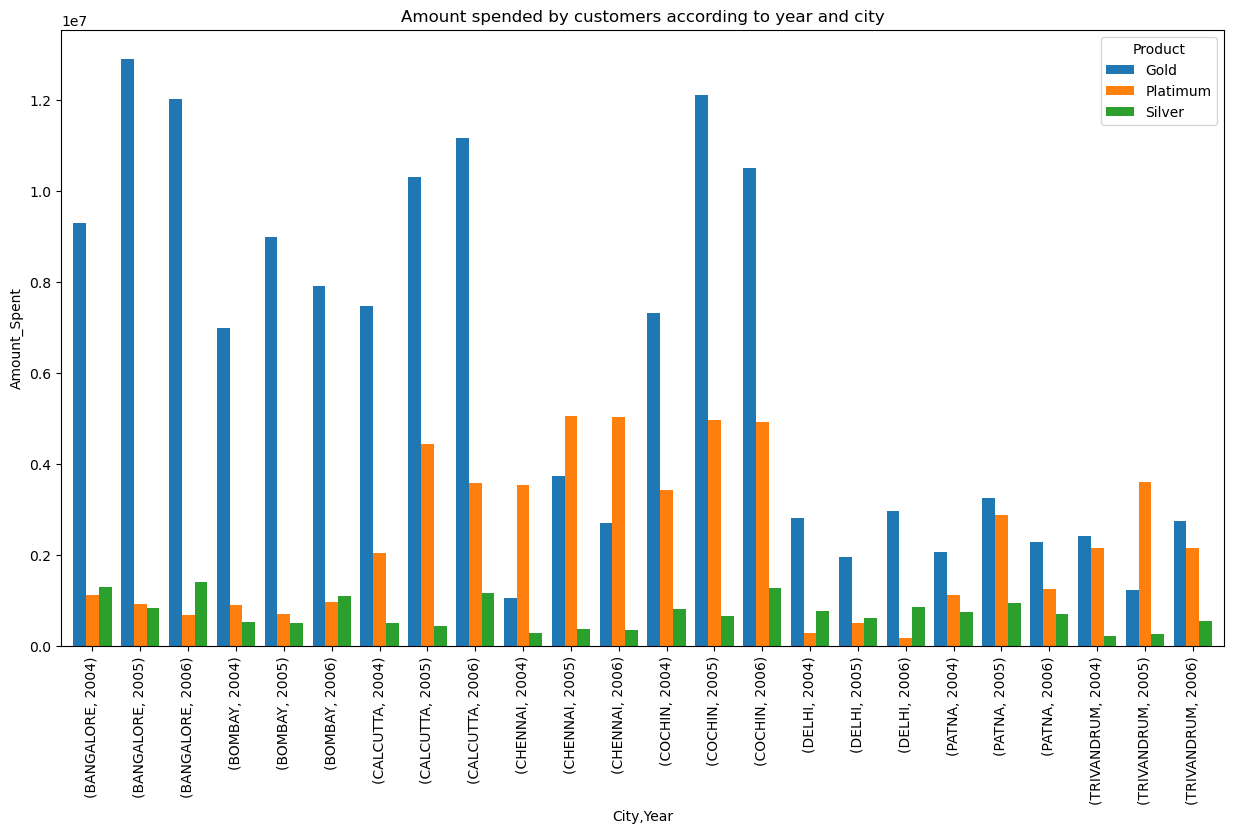

In [168]:
customer_spend_pivot.plot(kind='bar',figsize=(15,8),width=0.8)
plt.ylabel("Amount_Spent")
plt.title("Amount spended by customers according to year and city")
plt.show()

##### 4. Create graphs for a. Monthly comparison of total spends, city wise

In [169]:
customer_spend.head(3)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,72-80,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,72-80,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,72-80,2004


In [170]:
customer_spend['Month']=pd.to_datetime(customer_spend['Month'])

In [171]:
customer_spend['Monthly']=customer_spend['Month'].apply(lambda x: pd.Timestamp.strftime(x,"%B"))

In [172]:
customer_spend.head(3)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,72-80,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,72-80,2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,72-80,2004,January


In [183]:
#creating pivot table based on "Monthly" and "City" columns
monthly_spend_pivot = pd.pivot_table(data=customer_spend, index=['City'],columns=['Monthly'],values='Amount',aggfunc=sum)
monthly_spend_pivot

C:\Users\admin\AppData\Local\Temp\ipykernel_1516\1165135014.py:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  monthly_spend_pivot = pd.pivot_table(data=customer_spend, index=['City'],columns=['Monthly'],values='Amount',aggfunc=sum)


Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


In [181]:
#grouping data based on "Monthly" and "City" columns
monthly_spend_group = customer_spend.groupby(["Monthly","City"])[["Amount"]].sum().sort_values(by="Amount").reset_index()
monthly_spend_group

,Monthly,City,Amount
0,July,PATNA,50000.00
1,December,PATNA,50000.00
2,September,DELHI,50001.00
3,July,DELHI,50001.50
4,December,CALCUTTA,55001.50
...,...,...,...
91,February,BANGALORE,6734494.76
92,February,CALCUTTA,8150545.61
93,January,BANGALORE,9041796.84
94,January,CALCUTTA,9064864.90


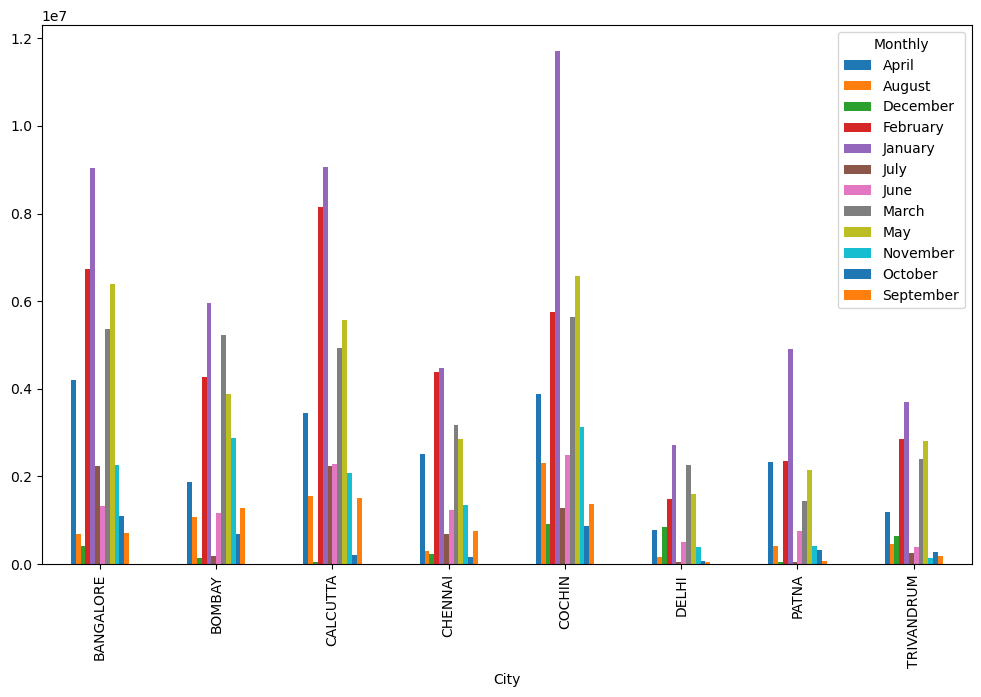

In [184]:
monthly_spend_pivot.plot(kind='bar',figsize=(12,7), width=0.5)
plt.show()

##### b. Comparison of yearly spend on air tickets

In [198]:
type_spend=customer_spend.groupby(['Year','Type'])['Amount'].sum().reset_index()
type_spend

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
1,2004,AUTO,254745.28
2,2004,BIKE,476635.28
3,2004,BUS TICKET,5822074.21
4,2004,CAMERA,10122819.72
5,2004,CAR,2326442.62
6,2004,CLOTHES,2685429.91
7,2004,FOOD,7727298.46
8,2004,JEWELLERY,2579785.80
9,2004,MOVIE TICKET,1588392.99


In [201]:
airticket_spend=type_spend.loc[type_spend['Type']== 'AIR TICKET']
airticket_spend

,Year,Type,Amount
0,2004,AIR TICKET,4357225.35
15,2005,AIR TICKET,10550152.21
30,2006,AIR TICKET,5248469.56


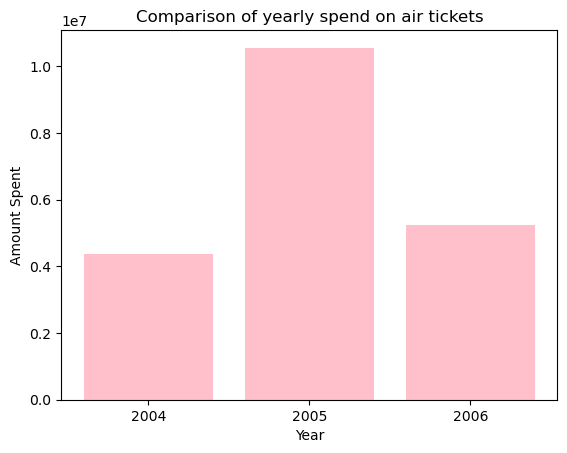

In [210]:
plt.bar(airticket_spend['Year'], height=airticket_spend['Amount'],color="pink")
plt.xlabel("Year")
plt.ylabel("Amount Spent")
plt.title("Comparison of yearly spend on air tickets")
plt.show()


##### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [211]:
customer_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,72-80,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,72-80,2004,January


In [213]:
product_wise = pd.pivot_table(data=customer_spend,index='Product',columns='Monthly',values='Amount',aggfunc='sum')

In [214]:
product_wise

Monthly,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
Gold,13170572.59,4954030.42,2332940.96,24779179.55,32413831.83,5167416.37,6538862.64,19256972.48,21548169.76,9203267.46,3018223.38,3816887.62
Platimum,5182493.86,1714762.80,750156.19,9134054.58,14951578.51,1288156.26,2965712.71,7288837.68,8151926.49,2741618.42,550275.04,1667840.84
Silver,1902322.65,293109.82,200537.90,2087018.37,4206383.62,530153.72,689537.61,3909405.83,2140940.01,691102.63,100001.50,442803.13


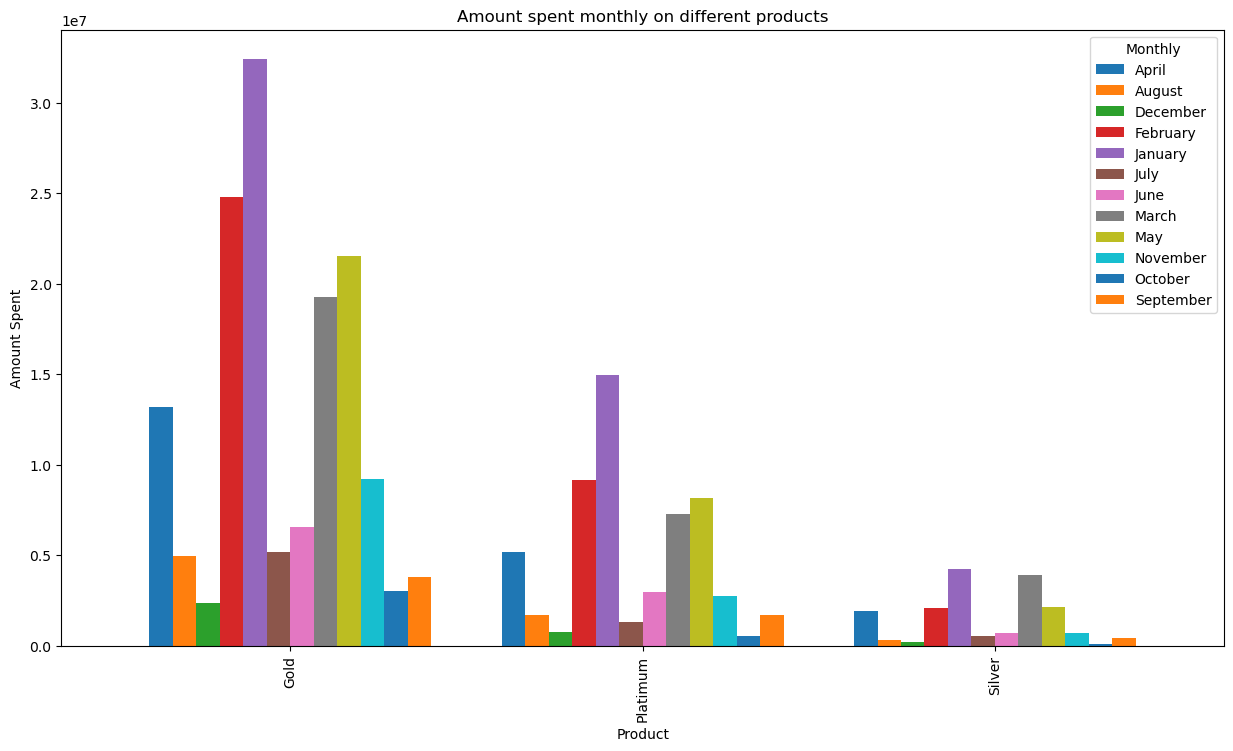

In [216]:
product_wise.plot(kind='bar', figsize=(15,8), width=0.8)
plt.ylabel('Amount Spent')
plt.title('Amount spent monthly on different products')
plt.show()

##### 5. Write user defined PYTHON function to perform the following analysis:   

##### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [217]:
customer_repay.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06


In [218]:
# converting 'Month' column to date time format
customer_repay['Month'] = pd.to_datetime(customer_repay['Month'])

C:\Users\admin\AppData\Local\Temp\ipykernel_1516\3630361381.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_repay['Month'] = pd.to_datetime(customer_repay['Month'])


In [219]:
#creating new column "Monthly" and "Yearly" using already existing 'Month' column
customer_repay['Monthly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
customer_repay['Yearly'] = customer_repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [220]:
customer_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Monthly,Yearly
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02,January,2004
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,2004-01-15,259490.06,January,2004
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,2004-01-25,437555.12,January,2004
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,2005-01-17,165972.88,January,2005
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,6.0,2005-02-23,365366.62,February,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,2004-01-25,100000.00,January,2004
1495,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,2004-01-12,10000.00,January,2004
1496,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,2004-01-03,10001.00,January,2004
1497,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101.0,2004-01-15,10002.00,January,2004


In [239]:
def summary_report(product,timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot = customer_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result

In [240]:
summary_report('gold','monthly')

Give the product name and timeperiod for which you want the data


Monthly                           April     August   December    February  \
Product City       Customer                                                 
Gold    BANGALORE  A1         508949.16        NaN        NaN   781873.80   
                   A13        494392.40  873304.51        NaN  2049808.15   
                   A14        812582.20  198623.13  388821.96  1482923.34   
                   A30        425694.16        NaN        NaN  1321469.80   
                   A43        612541.80        NaN        NaN   763846.93   
                   A63              NaN        NaN        NaN         NaN   
                   A81              NaN        NaN        NaN         NaN   
                   A88              NaN        NaN        NaN         NaN   
                   A92        459105.69        NaN        NaN         NaN   
        COCHIN     A11        958466.08  332677.61        NaN  1069789.26   
                   A16        338710.86        NaN        NaN   331143.85   
                   A32        333042.82   99528.43        NaN   851127.91   
                   A45       1435443.21  431769.44  410935.52  1241580.90   
                   A61       3412860.60  197804.13        NaN  1345911.54   
                   A65              NaN        NaN        NaN         NaN   
                   A90        109931.32        NaN        NaN         NaN   
                   A94              NaN        NaN        NaN         NaN   
        CALCUTTA   A10        478747.41        NaN        NaN   652033.51   
                   A15              NaN   17981.25        NaN   516544.51   
                   A29              NaN  534103.41        NaN   627147.67   
                   A31         13054.67        NaN        NaN   962656.24   
                   A60       2397565.91  735660.40        NaN  1403731.08   
                   A89        497237.97        NaN        NaN         NaN   
        BOMBAY     A12        601326.07  120471.17        NaN  1978117.59   
                   A17        391463.29   98341.04  479227.30   374865.01   
                   A42        173199.87        NaN        NaN   476213.23   
                   A62       1115760.01        NaN        NaN   478764.07   
                   A91        247781.00        NaN        NaN         NaN   
        CHENNAI    A27        379529.81  472123.57  136860.63   841114.02   
                   A67              NaN        NaN        NaN         NaN   
        TRIVANDRUM A28        115326.71  437823.07  451630.26   968709.79   
        PATNA      A26        558432.60  398164.37  417177.67  1298000.32   
                   A66              NaN        NaN        NaN         NaN   
                   A95              NaN        NaN        NaN         NaN   
        DELHI      A44        346650.76  539494.72   79696.21   745752.19   
                   A64              NaN        NaN  212614.48         NaN   
                   A82              NaN        NaN        NaN         NaN   
                   A93              NaN        NaN        NaN         NaN   

Monthly                         January        July       June       March  \
Product City       Customer                                                  
Gold    BANGALORE  A1        1912391.54   297176.74        NaN         NaN   
                   A13       2014186.98   424603.55  837101.91  1183569.05   
                   A14        993114.87    41962.19   41128.98  1682886.51   
                   A30        608066.49         NaN   72609.24   599331.38   
                   A43       1978038.15   803935.53   23525.91  1378774.72   
                   A63        372179.26         NaN        NaN         NaN   
                   A81              NaN         NaN        NaN   207780.32   
                   A88              NaN         NaN        NaN   146821.30   
                   A92              NaN         NaN        NaN         NaN   
        COCHIN     A11        958556.39   128484.37        Na